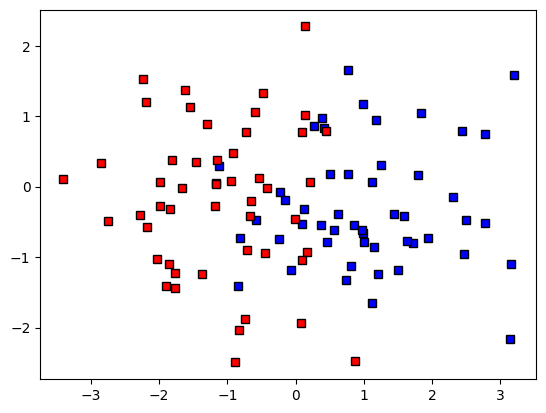

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

nPerClust = 50
A = [  1, 0 ]
B = [ -1, 0 ]

a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]

data = np.transpose( np.concatenate((a,b),axis=1) )
grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))

groupcolors = 'br'

fig,ax = plt.subplots(1)
ax.plot(data[grouplabels==0,0],data[grouplabels==0,1],'ks',markerfacecolor=groupcolors[0])
ax.plot(data[grouplabels==1,0],data[grouplabels==1,1],'ks',markerfacecolor=groupcolors[1])
plt.show()

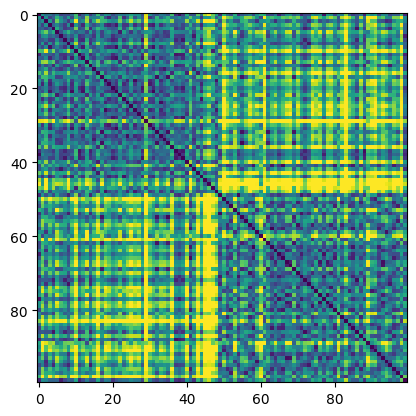

In [2]:
distmat = np.zeros((nPerClust*2,nPerClust*2))

for i in range(nPerClust*2):
    for j in range(nPerClust*2):
        distmat[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

plt.imshow(distmat,vmax=4)
plt.show()

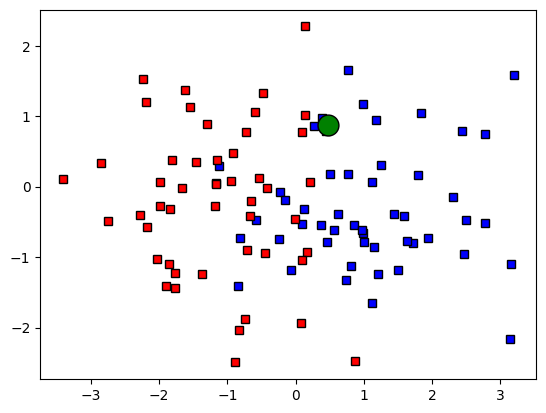

In [7]:
newpoint = 2*np.random.rand(2)-1

ax.plot(newpoint[0],newpoint[1],'ko', markerfacecolor='g',markersize=15)
fig

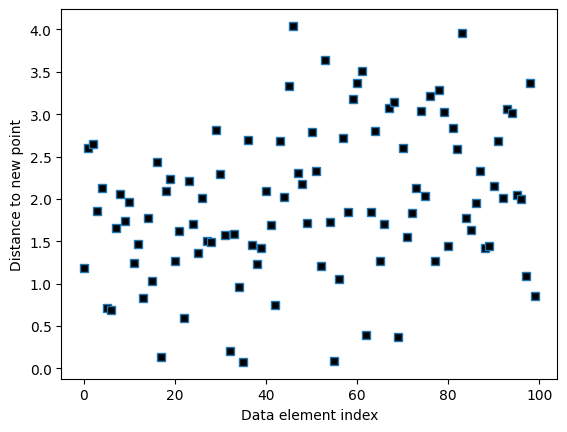

In [8]:
distvec = np.zeros(nPerClust*2)

for i in range(nPerClust*2):
    distvec[i] = np.sqrt( (data[i,0]-newpoint[0])**2 + (data[i,1]-newpoint[1])**2 )

plt.plot(distvec, 's', markerfacecolor='k')
plt.xlabel('Data element index')
plt.ylabel('Distance to new point')
plt.show()

In [5]:
k = 3

sortidx = np.argsort(distvec)

print(grouplabels[sortidx[:k]])
whichgroup = int( np.median(grouplabels[sortidx[:k]]) )
print('New data belong to group ' + str(whichgroup))

ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor='g',markersize=15)
ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor=groupcolors[whichgroup])
ax.plot(data[sortidx[:k],0],data[sortidx[:k],1],'ko',markersize=10,fillstyle='none')
fig

[0. 1. 1.]
New data belong to group 1


AttributeError: Line2D.set() got an unexpected keyword argument 'MarkerFaceColor'

In [6]:
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(data,grouplabels)

whichgroupP = knn.predict(newpoint.reshape(1,-1))

print('New data belong to group ' + str(whichgroupP[0]))

New data belong to group 1.0
